## This report is Suffolk County local (including 33 villages) shopping. Data scrpaed from foursquare 

## Summary: This report follows the idea of analysis on Smith Haven Mall local (Lake Grove) shopping. I put the same analysis to a larger range on the entire Suffolk County. Besides, we can also get by-product of Smith Haven Mall's protential competitors' performance, such as tanger-outlet-deer-park in Babylon or walt-whitman-shops in Lloyd Harbor. Futere product vision is included in the end. 

In [71]:
_author_ = "Peimeng Sui"
import selenium
import time,re,json,numpy as np
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import matplotlib
from selenium import webdriver
from bs4 import BeautifulSoup
import urllib
import pdb
import foursquare
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import glob
%matplotlib inline
from textblob import TextBlob
import math
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [72]:
path ='/home/peimengsui/Documents/SpaceJam/SmithHaven/Suffolk_Shopping' # use your path
allFiles = glob.glob(path + "/*.pkl")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_pickle(file_)
    list_.append(df)
frame = pd.concat(list_)

In [73]:
frame.shape

(836, 12)

In [74]:
data1=[]
data1 = frame[~frame.index.duplicated(keep='first')]
data1.shape

(669, 12)

In [75]:
data1 = data1[data1["tips"]>0]

In [76]:
data1.head()

,checkins,likes,photos,sub_cat,tips,users,visits,Category,zone,venue,tips_text,category
4dea5d85d4c00071b820bd21,36,1,2,[Jewelry Store],1,19,36,shopping,Mastic Beach,enricos-jewelry-exchange,[best place for all of your jewelry needs],shopping
515d93bbe4b09c75b47f8d00,108,1,4,"[Discount Store, Arts & Crafts Store]",1,40,122,shopping,Mastic Beach,dollar-tree,[delaware valley… everything’s $1 at dollar tr...,shopping
4c73f2072db5236a6ddfb879,191,10,1,[Pet Store],4,143,303,shopping,Mastic Beach,shirley-feed,"[very clean and organized, people are helpful ...",shopping
4baa787bf964a520106d3ae3,263,4,12,[Mobile Phone Shop],12,87,269,shopping,Mastic Beach,att,[enjoy savings for the whole family with a gre...,shopping
4bdc73ba2a3a0f4749e7b2b6,2178,32,9,"[Department Store, Furniture / Home Store, Kid...",2,867,2747,shopping,Mastic Beach,kohls,"[cute clothes and good prices !!!, awesome pri...",shopping


In [77]:
data1.shape

(333, 12)

## There are 333 shopping venues received tips listed in our data.

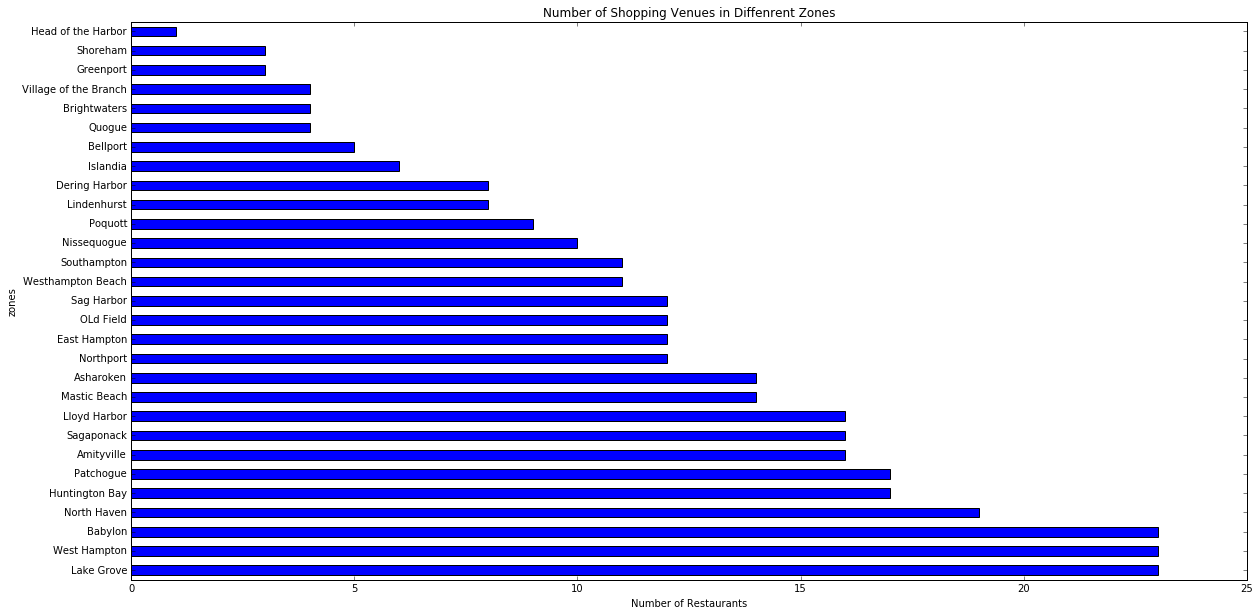

In [78]:
plt.figure()
plt.title('Number of Shopping Venues in Diffenrent Zones')
data1.zone.value_counts().plot(kind='barh')
plt.xlabel('Number of Restaurants')
plt.ylabel('zones')
plt.show()

## Shopping venues are distributed in different villages of Suffolk County

In [79]:
def get_sentiment_score(txt):
    text=[]
    for tips in txt:
        text.append(re.sub(r'^https?:\/\/.*[\r\n]*', '', tips, flags=re.MULTILINE))
    polarity=[]
    for tip in text:
        testimonial = TextBlob(tip)
        polarity.append(testimonial.sentiment.polarity)
    vals=np.array(polarity)
    if vals.size != 0:
        score = sum(vals>0)/(vals.size)
        return score
    else : 
        return 0
data1["sentiment_score"]=data1["tips_text"].apply(get_sentiment_score)

## We can identify two potential competitors for Smith Haven Mall, such as tanger-outlet-deer-park in Babylon or walt-whitman-shops in Lloyd Harbor. The following analysis is focusing on Babylon and Lloyd Harbor. 

In [80]:
data1.sort("checkins",ascending = False).head(n=10)

/home/peimengsui/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,checkins,likes,photos,sub_cat,tips,users,visits,Category,zone,venue,tips_text,category,sentiment_score
4b3f6364f964a52040a625e3,42336,363,210,[Shopping Mall],40,10718,44072,shopping,Lake Grove,smith-haven-mall,"[food: cheesecake factory, california pizza ki...",shopping,0.550000
4a08384df964a520a4731fe3,33473,521,362,"[Outlet Store, Shopping Mall]",60,13728,35391,shopping,Babylon,tanger-outlet-deer-park,[nice place to shop even if the number and div...,shopping,0.716667
4ae33efdf964a5203f9221e3,25301,219,127,[Shopping Mall],75,7348,26040,shopping,Lloyd Harbor,walt-whitman-shops,[check out godiva's new location by guest serv...,shopping,0.626667
4b43db7af964a52041ec25e3,10526,97,29,"[Big Box Store, Department Store, Clothing Store]",12,3809,15436,shopping,North Haven,target,[its one of the biggest target stores in conne...,shopping,0.500000
4b98f902f964a520755935e3,7312,74,37,"[Shopping Mall, Miscellaneous Shop]",17,2076,7360,shopping,West Hampton,the-avenue-west-cobb,[stop by the avenue management office next to ...,shopping,0.823529
4ace18a5f964a5205dce20e3,5755,57,37,[Big Box Store],10,2476,8430,shopping,West Hampton,target,"[becoming a grocery store as well!, they alway...",shopping,0.400000
4a077d66f964a52069731fe3,5674,94,56,[Bookstore],20,2196,5964,shopping,Lake Grove,barnes--noble,[just love the atmosphere of a bookstore! kin...,shopping,0.800000
4b3e32d7f964a520779925e3,4830,74,22,"[Department Store, Clothing Store, Cosmetics S...",10,2526,5587,shopping,Lake Grove,macys,[these people are so genuine with their sugges...,shopping,0.400000
4b805ee2f964a520466c30e3,4156,67,24,"[Department Store, Clothing Store, Cosmetics S...",14,1968,5118,shopping,Lloyd Harbor,bloomingdales,[as an employee who eats at the café there a l...,shopping,0.857143
4b53795ff964a520de9e27e3,4069,48,12,[Warehouse Store],7,1502,5968,shopping,North Haven,bjs-wholesale-club,"[almost the best bj's!!! has a gas station, an...",shopping,0.571429


(array([ 274.,   37.,    8.,    9.,    2.,    0.,    0.,    0.,    1.,    2.]),
 array([ 0.        ,  0.18548869,  0.37097737,  0.55646606,  0.74195474,
         0.92744343,  1.11293212,  1.2984208 ,  1.48390949,  1.66939818,
         1.85488686]),
 <a list of 10 Patch objects>)

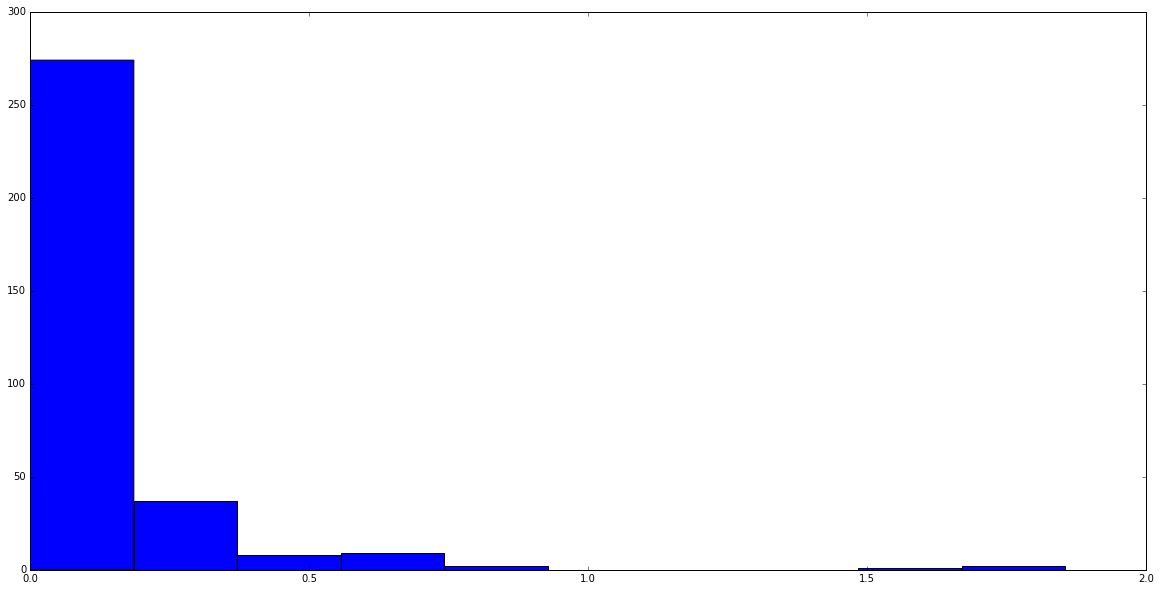

In [81]:
score_data = data1[["checkins","likes","photos","tips","users","visits"]]

data1["score"] = ((score_data - score_data.min()) / (score_data.max() - score_data.min())).sum(axis=1)
data1["score"] = np.log1p(data1["score"])
plt.hist(data1["score"])

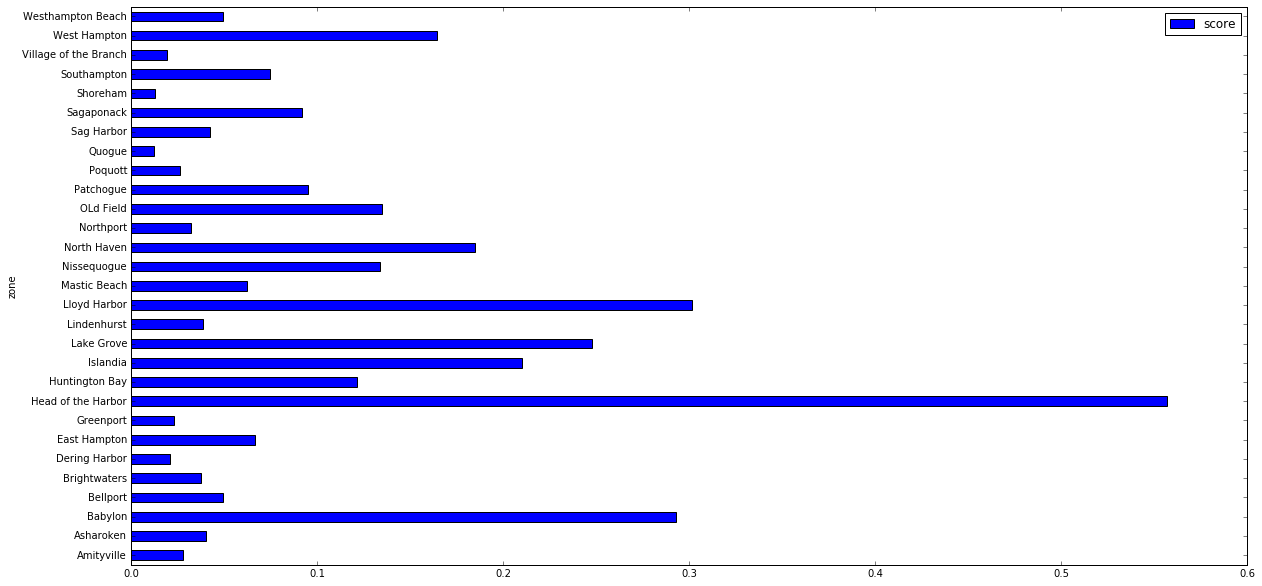

In [82]:
(data1[["zone","score"]].groupby("zone").mean()).plot(kind="barh")

## According to our preference index, we can see that top ones are Head of the Harbor, Lloyd Harbor, Babylon and Lake Grove. Showing this score ranking can motivate Smith Haven to pay attenting to the above locations in our future map app.

## Now let's check out Babylon

In [92]:
Babylon = data1[data1["zone"]=="Babylon"]

In [93]:
Babylon.head()

,checkins,likes,photos,sub_cat,tips,users,visits,Category,zone,venue,tips_text,category,sentiment_score,score
4cdb0d8ec409b60c5376d21a,785,10,124,[Arts & Crafts Store],3,43,813,shopping,Babylon,the-village-knitter,[get there early on knit night to snag a food ...,shopping,0.333333,0.356894
4bca28033740b713d3326065,574,10,12,[Department Store],1,310,644,shopping,Babylon,big-lots,"[there's always some really cheap stuff, espec...",shopping,1.000000,0.098120
4aaeec06f964a520bd6320e3,1681,46,34,[Record Shop],13,843,1844,shopping,Babylon,looney-tunes-cds,[great little record shop with loads of new & ...,shopping,0.769231,0.396983
4cfcf462c6cca35df0469432,827,8,8,[Discount Store],2,237,846,shopping,Babylon,dollar-tree,[hit & miss. u find something one time u may n...,shopping,0.500000,0.101619
4cf0536b8333224b698b038e,1227,29,17,"[Pet Store, Pet Service]",9,614,1887,shopping,Babylon,petsmart,"[i get my puppy his training classes, his hair...",shopping,0.444444,0.283114


In [94]:
Babylon=pd.concat([Babylon,Babylon["sub_cat"].str.join(sep=',').str.get_dummies(sep=',')],axis=1)

In [95]:
Babylon.columns

Index(['checkins', 'likes', 'photos', 'sub_cat', 'tips', 'users', 'visits',
       'Category', 'zone', 'venue', 'tips_text', 'category', 'sentiment_score',
       'score', 'Accessories Store', 'Arts & Crafts Store', 'Bookstore',
       'Clothing Store', 'Department Store', 'Discount Store', 'Gaming Cafe',
       'Kids Store', 'Men's Store', 'Miscellaneous Shop', 'Mobile Phone Shop',
       'Outlet Store', 'Pet Service', 'Pet Store', 'Plaza', 'Record Shop',
       'Shoe Store', 'Shopping Mall', 'Sporting Goods Shop',
       'Thrift / Vintage Store', 'Video Game Store', 'Warehouse Store',
       'Wine Bar', 'Wine Shop', 'Winery'],
      dtype='object')

In [96]:
names = []
checkins = []
for col in Babylon.columns[14:]:
    names.append(Babylon.groupby(col)["checkins"].sum().index.name)
    checkins.append(Babylon.groupby(col)["checkins"].sum().values[1])
dicts = {}
for i in range(len(names)):
    dicts[names[i]] = checkins[i]

In [97]:
dicts

{'Accessories Store': 611,
 'Arts & Crafts Store': 1199,
 'Bookstore': 391,
 'Clothing Store': 2144,
 'Department Store': 8260,
 'Discount Store': 1241,
 'Gaming Cafe': 180,
 'Kids Store': 1702,
 "Men's Store": 1381,
 'Miscellaneous Shop': 3096,
 'Mobile Phone Shop': 207,
 'Outlet Store': 35124,
 'Pet Service': 3304,
 'Pet Store': 3967,
 'Plaza': 1650,
 'Record Shop': 1681,
 'Shoe Store': 4472,
 'Shopping Mall': 35123,
 'Sporting Goods Shop': 2428,
 'Thrift / Vintage Store': 151,
 'Video Game Store': 180,
 'Warehouse Store': 2945,
 'Wine Bar': 1895,
 'Wine Shop': 1895,
 'Winery': 1895}

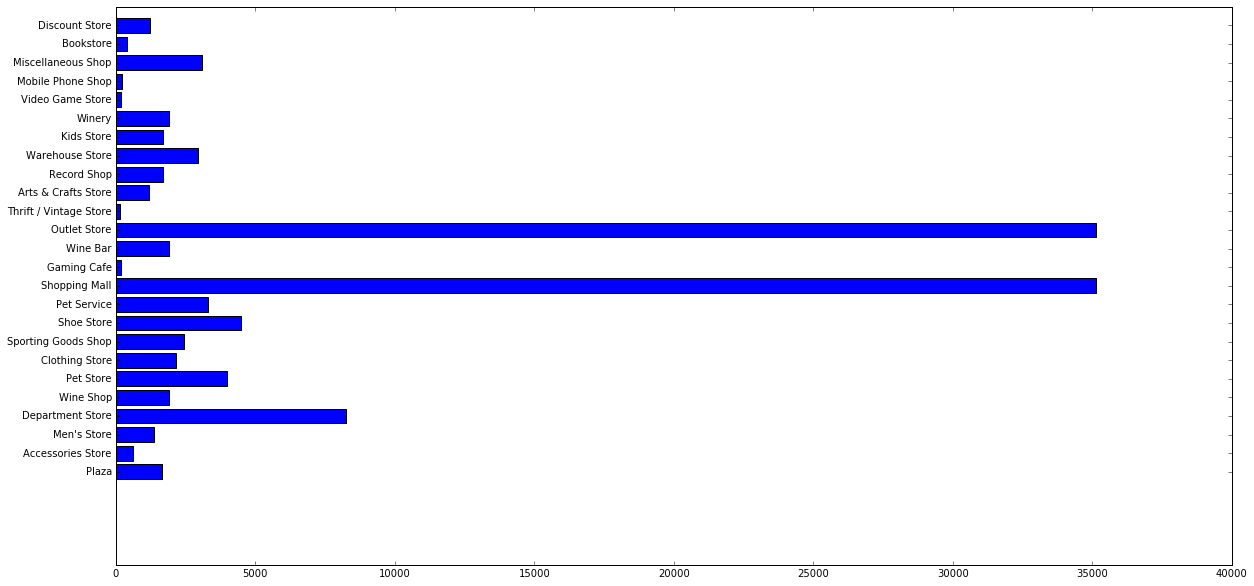

In [98]:
plt.barh(range(len(dicts)), dicts.values(), align='center')
plt.yticks(range(len(dicts)), dicts.keys())

plt.show()

## Checkins in Outlet Store, Shopping Mall and Department Store are dominantly high

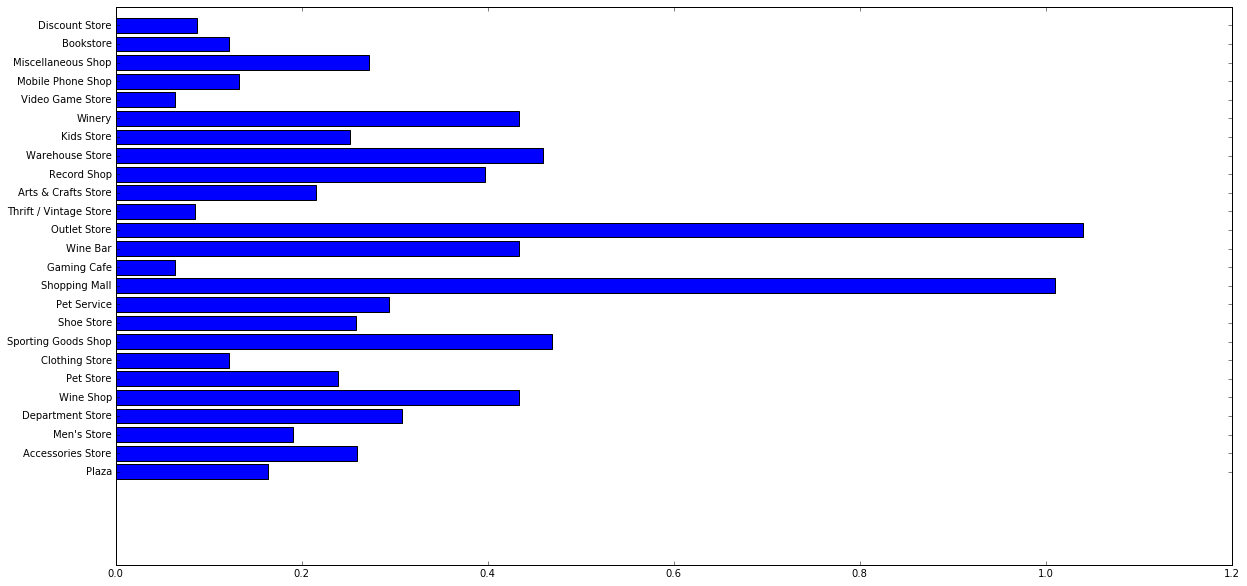

In [99]:
names1 = []
score = []
for col in Babylon.columns[14:]:
    names1.append(Babylon.groupby(col)["score"].mean().index.name)
    score.append(Babylon.groupby(col)["score"].mean().values[1])
dicts1 = {}
for i in range(len(names1)):
    dicts1[names1[i]] = score[i]
plt.barh(range(len(dicts1)), dicts1.values(), align='center')
plt.yticks(range(len(dicts1)), dicts1.keys())

plt.show()

## Besides the largest shopping mall, sports shop also performs well as in Lake Grove. However, Lake Grove's preference bookstore is not very popular in this village.

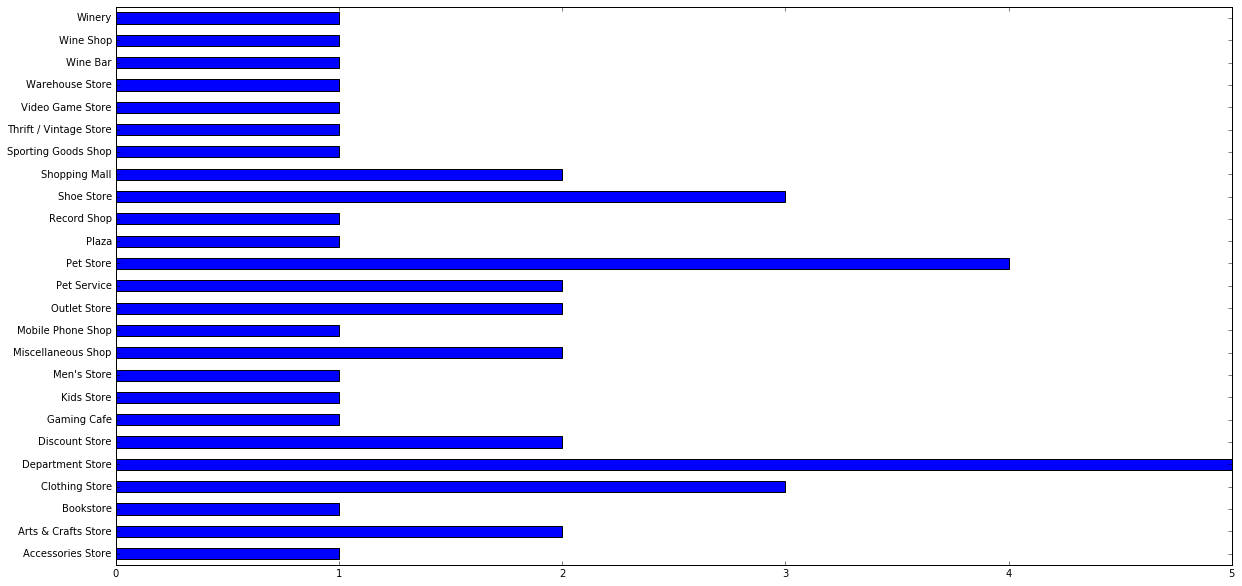

In [100]:
Babylon[Babylon.keys()[14:]].sum(axis=0).plot(kind="barh")

## There is even no store specified as women's store or hunting supply in this village. This will motivate Smith Haven to target marketing their potential customers here in Babylon. 

## Now let's compare to Lloyd Harbor

In [102]:
Lloyd_Harbor = data1[data1["zone"]=="Lloyd Harbor"]

In [103]:
Lloyd_Harbor.columns

Index(['checkins', 'likes', 'photos', 'sub_cat', 'tips', 'users', 'visits',
       'Category', 'zone', 'venue', 'tips_text', 'category', 'sentiment_score',
       'score'],
      dtype='object')

In [104]:
Lloyd_Harbor=pd.concat([Lloyd_Harbor,Lloyd_Harbor["sub_cat"].str.join(sep=',').str.get_dummies(sep=',')],axis=1)

In [105]:
names = []
checkins = []
for col in Lloyd_Harbor.columns[14:]:
    names.append(Lloyd_Harbor.groupby(col)["checkins"].sum().index.name)
    checkins.append(Lloyd_Harbor.groupby(col)["checkins"].sum().values[1])
dicts = {}
for i in range(len(names)):
    dicts[names[i]] = checkins[i]
dicts

{'Accessories Store': 389,
 'Arts & Crafts Store': 2312,
 'Big Box Store': 3388,
 'Boutique': 389,
 'Clothing Store': 6390,
 'Cosmetics Shop': 5916,
 'Department Store': 10662,
 'Farm': 311,
 'Farmers Market': 311,
 'Flower Shop': 306,
 'Health Food Store': 689,
 'Lingerie Store': 1690,
 'Perfume Shop': 820,
 'Salon / Barbershop': 1748,
 'Shopping Mall': 25301,
 'Sporting Goods Shop': 218,
 "Women's Store": 1690}

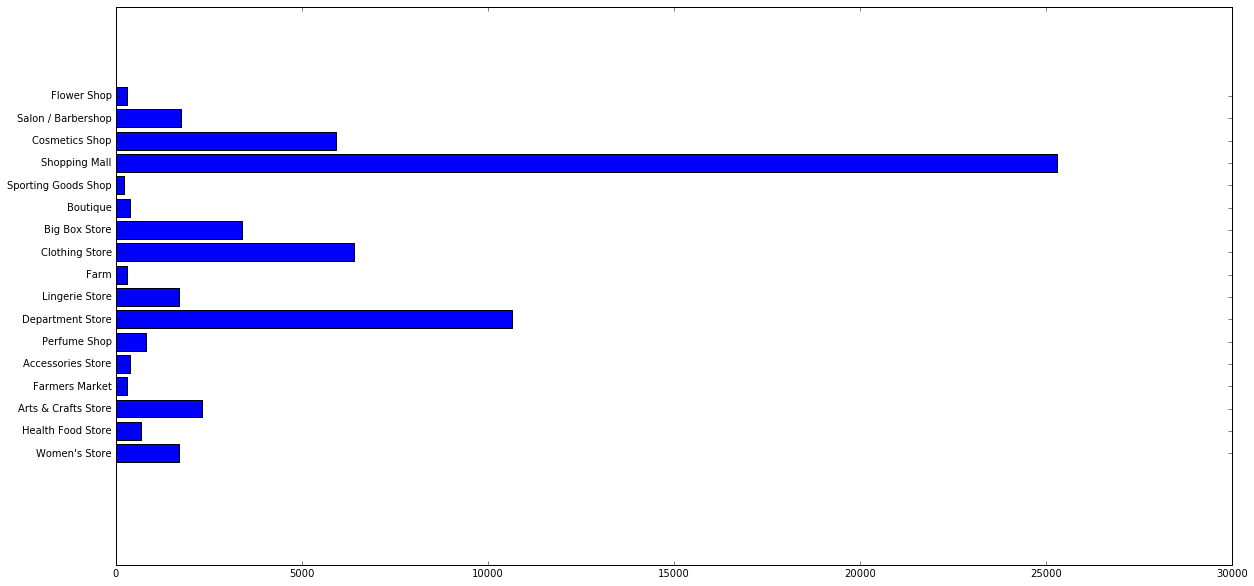

In [106]:
plt.barh(range(len(dicts)), dicts.values(), align='center')
plt.yticks(range(len(dicts)), dicts.keys())

plt.show()

## Checkin distribution really similar to Lake Grove with spikes in shopping mall, cosmetics shop, clothing shop and department store.

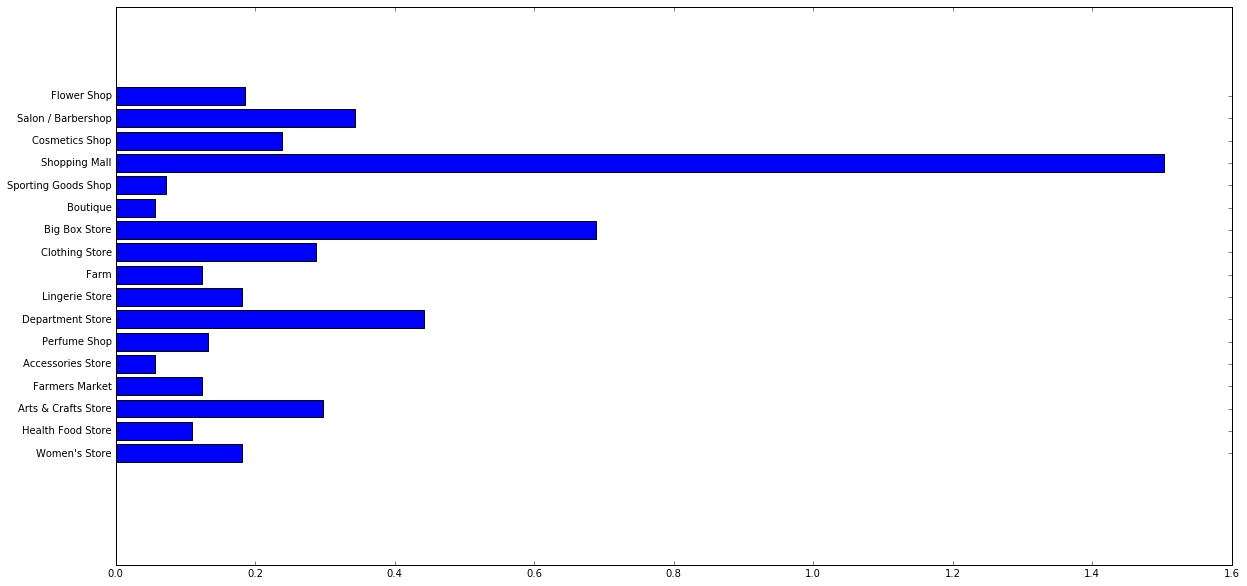

In [109]:
names1 = []
score = []
for col in Lloyd_Harbor.columns[14:]:
    names1.append(Lloyd_Harbor.groupby(col)["score"].mean().index.name)
    score.append(Lloyd_Harbor.groupby(col)["score"].mean().values[1])
dicts1 = {}
for i in range(len(names1)):
    dicts1[names1[i]] = score[i]
plt.barh(range(len(dicts1)), dicts1.values(), align='center')
plt.yticks(range(len(dicts1)), dicts1.keys())

plt.show()

## Shopping categories here is not very diversified. 

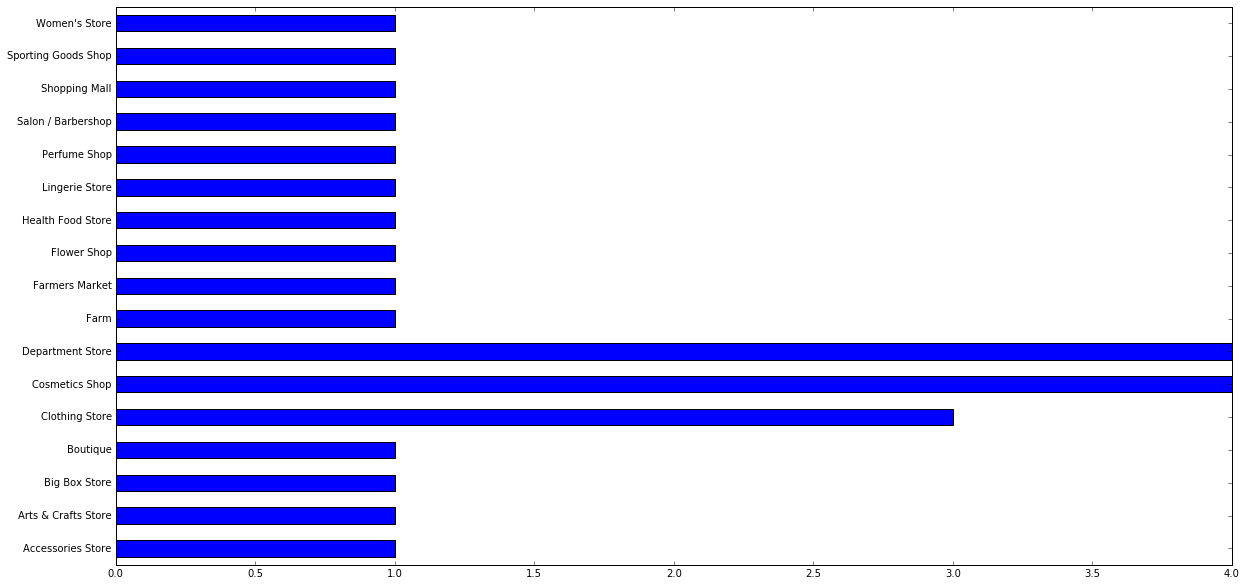

In [110]:
Lloyd_Harbor[Lloyd_Harbor.keys()[14:]].sum(axis=0).plot(kind="barh")

## Some Prodect Vision: 
## 1. This location by location analysis should fit well in our potential map app. Our customers will use it to explore not only their local neighborhoods, but also any area surronding them.
## 2. Our analysis can help them easily find potential competitiors around. We can let them know their advantages and disadvantages against competitors. Knowing what local and near-by people prefer can lead to better decisions. 
## 3. This can also help us to find potential customers. For example, we can easily find by similarity our potential partners around Smith Haven.
## 4. When we collect enough data from different locations, we can try a recommender system, which will vote automatically. This can be a good supplement to our crowdsourcing vote. 